## Summary

From scientific fields like meteorology and climatology, through to the software on smartphones like Google Maps and Facebook check-ins, geographic data is always present in everyday life.
This projects explores the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. The flight data set used is taken from the [openflights website](https://openflights.org/data.html) and used to visualize the data on maps with raw geographic data like latitudes and longitudes .


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# conda install basemap
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [84]:
airports_url="https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
airports = pd.read_csv(airports_url, header=None, index_col=0, skiprows=0)

In [85]:
airport_names = ["Name", "City" ,"Country", "IATA" ,"ICAO" ,"Latitude",
                 "Longitude", "Altitude" ,"Timezone" ,"DST" ,"Tz" ,"Type", "Source"]
len(airport_names)

airports.columns = airport_names
airports.index.name = "Airport ID"
airports.reset_index(inplace=True)

In [86]:
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [87]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 14 columns):
Airport ID    7543 non-null int64
Name          7543 non-null object
City          7495 non-null object
Country       7543 non-null object
IATA          7543 non-null object
ICAO          7543 non-null object
Latitude      7543 non-null float64
Longitude     7543 non-null float64
Altitude      7543 non-null int64
Timezone      7543 non-null object
DST           7543 non-null object
Tz            7543 non-null object
Type          7543 non-null object
Source        7543 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 825.1+ KB


In [88]:
airports.describe().round(2)

,Airport ID,Latitude,Longitude,Altitude
count,7543.00,7543.00,7543.00,7543.00
mean,5043.54,25.84,-2.42,1004.71
std,3684.47,28.43,86.42,1611.78
min,1.00,-90.00,-179.88,-1266.00
25%,1951.50,6.95,-79.39,62.50
50%,3982.00,34.13,5.71,352.00
75%,7576.50,47.37,53.27,1180.50
max,13726.00,82.52,179.95,14472.00


In [89]:
airports.shape

(7543, 14)

In [90]:
airports.columns.values

array(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source'], dtype=object)

In [91]:
airports.index

RangeIndex(start=0, stop=7543, step=1)

In [92]:
url_airlines = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat"
airlines = pd.read_csv(url_airlines, sep=",", header=None, index_col=0)

In [93]:
airlines_names = [ 
"Name" ,
"Alias" ,
"IATA", 
"ICAO" ,
"Callsign" ,
"Country" ,
"Active"]

airlines.columns = airlines_names
airlines.index.name = "Airline ID"
airlines.reset_index(inplace=True)

In [94]:
airlines.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [95]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
Airline ID    6162 non-null int64
Name          6162 non-null object
Alias         5657 non-null object
IATA          1535 non-null object
ICAO          6075 non-null object
Callsign      5354 non-null object
Country       6147 non-null object
Active        6162 non-null object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


In [96]:
airlines.describe()

,Airline ID
count,6162.000000
mean,4152.723304
std,4507.307094
min,-1.000000
25%,1541.250000
50%,3082.500000
75%,4628.750000
max,21317.000000


In [97]:
airlines.columns.values

array(['Airline ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign',
       'Country', 'Active'], dtype=object)

In [98]:
airlines.shape

(6162, 8)

In [99]:
airlines.index

RangeIndex(start=0, stop=6162, step=1)

In [100]:
url_routes = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
routes = pd.read_csv(url_routes, sep=",", index_col=None, header=None)

In [101]:
routes_name =[
"Airline",
"Airline ID",
"Source airport",
"Source airport ID",
"Destination airport",
"Destination airport ID",
"Codeshare",
"Stops",
"Equipment",
]
routes.columns = routes_name

In [102]:
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [103]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
Airline                   67663 non-null object
Airline ID                67663 non-null object
Source airport            67663 non-null object
Source airport ID         67663 non-null object
Destination airport       67663 non-null object
Destination airport ID    67663 non-null object
Codeshare                 14597 non-null object
Stops                     67663 non-null int64
Equipment                 67645 non-null object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [104]:
routes.describe().round(2)

,Stops
count,67663.00
mean,0.00
std,0.01
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [105]:
routes.shape

(67663, 9)

In [106]:
routes.index

RangeIndex(start=0, stop=67663, step=1)

What's the best way to link the data from these 3 different datasets together? <br>
IATA' ,'ICAO', AER, Source airport, Destination airport, Airline ID


In [107]:
print(airports.columns.values)
print(airlines.columns.values)
print(routes.columns.values)

print(airports.iloc[0,:])
print(airlines.iloc[0])
print(routes.iloc[0,:])

['Airport ID' 'Name' 'City' 'Country' 'IATA' 'ICAO' 'Latitude' 'Longitude'
 'Altitude' 'Timezone' 'DST' 'Tz' 'Type' 'Source']
['Airline ID' 'Name' 'Alias' 'IATA' 'ICAO' 'Callsign' 'Country' 'Active']
['Airline' 'Airline ID' 'Source airport' 'Source airport ID'
 'Destination airport' 'Destination airport ID' 'Codeshare' 'Stops'
 'Equipment']
Airport ID                       1
Name                Goroka Airport
City                        Goroka
Country           Papua New Guinea
IATA                           GKA
ICAO                          AYGA
Latitude                  -6.08169
Longitude                  145.392
Altitude                      5282
Timezone                        10
DST                              U
Tz            Pacific/Port_Moresby
Type                       airport
Source                 OurAirports
Name: 0, dtype: object
Airline ID         -1
Name          Unknown
Alias              \N
IATA                -
ICAO              NaN
Callsign           \N
Country     

What are the formats of the latitude and longitude values?

In [108]:
print(airports["Latitude"].dtypes)
print(airports["Longitude"].dtypes)

float64
float64


Creating a two-dimensional map of airports from the aiports data sets using matplotlib basemap.
<p>
For this reason it is necessary to convert latitude and longitude values to Cartesian coordinates.
</p>

Creating a basemap object / instance.
<p>
The longitude and latitude values are passed as lists into basemap object. This will convert the values
into Cartesian coordinates according to an algorithm or projection specified in the instance.
</p>

In [109]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
m 

Convert columns or pandas series into lists.

In [110]:
lat_list = airports["Latitude"].tolist()
long_list = airports["Longitude"].tolist()
print(lat_list[0:5])
print(long_list[0:5])

[-6.0816898345900015, -5.20707988739, -5.826789855957031, -6.569803, -9.443380355834961]
[145.391998291, 145.789001465, 144.29600524902344, 146.725977, 147.22000122070312]


Convert coordinate values into cartesian coordinates using the basemap object.

In [111]:
x,y = m(long_list, lat_list )
print(x[0:5])
print(y[0:5])

[36181922.34320894, 36226067.06123249, 36060053.53468947, 36330253.938054636, 36385186.8991693]
[14843790.099022955, 14941517.03312322, 14872287.435363792, 14789181.76842523, 14466474.13843642]


Make a scatter plot with the Cartesian coordinates

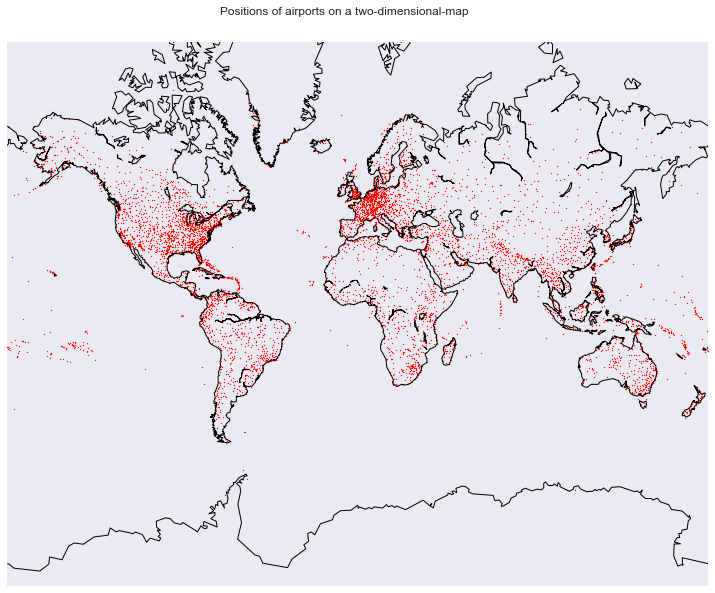

In [112]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Positions of airports on a two-dimensional-map", y=0.93)
m.scatter(x, y, s=1, color="red")
m.drawcoastlines()
plt.show()

Understanding the flight routes using great circles
<p>
A great circle is the shortest circle connecting 2 points on a sphere.
</p>

In [113]:

geo_routes = pd.read_csv("C:/Users/gamarandor/data_science/data-master/geo_routes.csv")
print(geo_routes.info())
print(geo_routes.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


One expample of a flight route drawn with a great circle

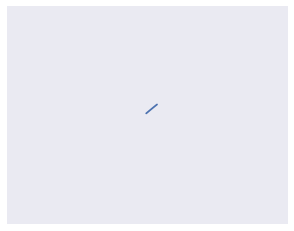

In [114]:
m.drawgreatcircle(geo_routes.loc[100, "start_lon"],  geo_routes.loc[100, "end_lon"],  geo_routes.loc[100, "start_lat"],
                  geo_routes.loc[100, "end_lat"])

Basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees 
for either the latitude or longitude values. This is because the basemap.drawgreatcircle() 
method isn't able to create great circles properly when they go outside of the map boundaries. 

In [115]:
geo_routes["Difference_longitudes"] = geo_routes["end_lon"] - geo_routes["start_lon"]
geo_routes["Long larger 180"] = geo_routes["Difference_longitudes"] > 180
geo_routes["Difference_latitudes"] =  geo_routes["start_lon"] - geo_routes["end_lon"]
geo_routes["Lat larger 180"] = geo_routes["Difference_latitudes"] > 180
print(geo_routes.info())
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 12 columns):
airline                  67428 non-null object
source                   67428 non-null object
dest                     67428 non-null object
equipment                67410 non-null object
start_lon                67428 non-null float64
end_lon                  67428 non-null float64
start_lat                67428 non-null float64
end_lat                  67428 non-null float64
Difference_longitudes    67428 non-null float64
Long larger 180          67428 non-null bool
Difference_latitudes     67428 non-null float64
Lat larger 180           67428 non-null bool
dtypes: bool(2), float64(6), object(4)
memory usage: 5.3+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat  \
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186   
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186   
2      2B    ASF  MRV 

Writing a function, named create_great_circles() that draws a great circle for each route that has an 
absolute difference in the latitude and longitude values less than 180.

Version 1: create_great_circles_1(df)

In [116]:
# Input is a df with longitude and  latitude values
# great circles are depending on basecamp object

def create_great_circles_1(df, basecamp_object):
    for i,row in df.iterrows():
        if (180 > abs(row["end_lon"] - row["start_lon"])or
            180 > abs(row["end_lat"] - row["start_lat"])):
            basecamp_object.drawgreatcircle(row["start_lon"],  row["start_lat"], 
                                  row["end_lon"] ,  row["end_lat"])
            
    

Version 2: create_great_circles_2(df)

In [117]:
def create_great_circles_2(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

Test the function selecting a source or starting aiport.<br>
Select only the rows in geo_routes where the value for the source column equals "DFW".

In [118]:
dfw = geo_routes[geo_routes["source"]=="DFW" ]

Draw flight routes from source airport with great circles 

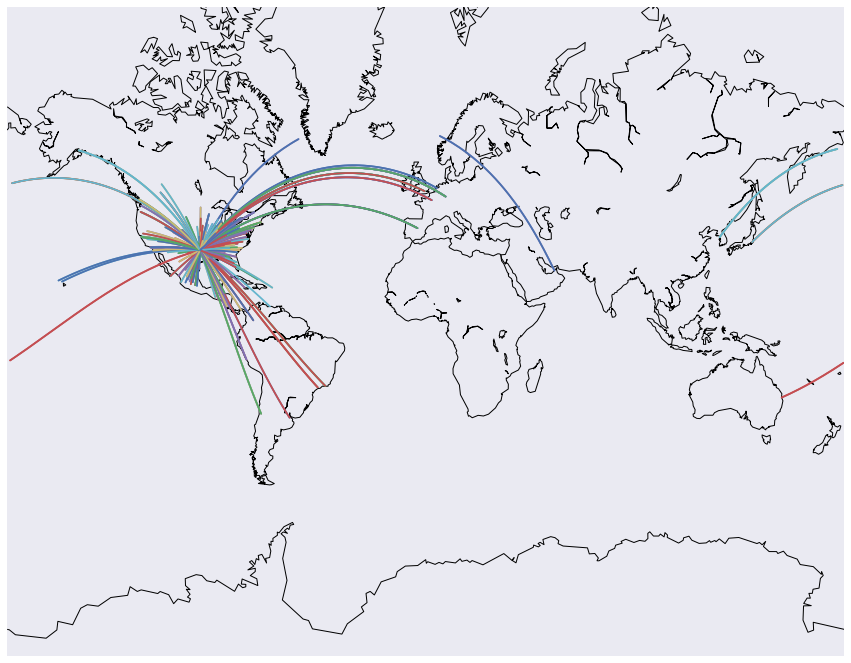

In [119]:
# Version 1
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

create_great_circles_1(dfw, m)
plt.show()

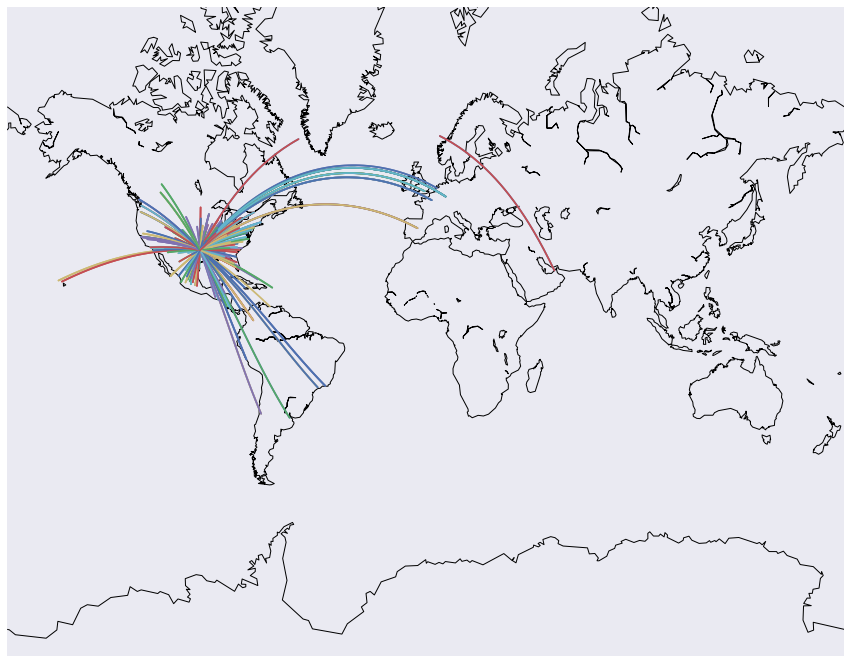

In [120]:
# Version 2
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

create_great_circles_2(dfw) 
plt.show()